Maestría Inteligencia de Negocios y Análisis de Datos\
Curso: Statistical Learning II\
Alumno: 22008067- Luis Pedro Perez

# Laboratorio #2

### Problema #1

Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

Se utilizará la foto de el Arco de Cabo san Lucas, Baja California Sur
![Arco de Cabo](https://a.cdn-hotels.com/gdcs/production171/d1958/0b23e146-74c8-4907-85c5-a0f9d24059e3.jpg?impolicy=fcrop&w=800&h=533&q=medium)

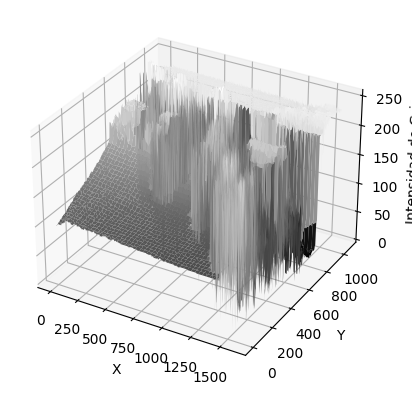

In [23]:
import numpy as np
import cv2
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_img_3d(imagen):
    # Se obtienen las dimensiones de la imagen
    alto, ancho = imagen.shape
    
    # Se establecen la malla de coordenadas X e Y
    x = np.arange(0, ancho, 1)
    y = np.arange(0, alto, 1)
    X, Y = np.meshgrid(x, y)
    
    # Se extraen los valores de intensidad de gris de la imagen
    Z = imagen
    
    # Crear una figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Graficar la superficie en 3D
    ax.plot_surface(X, Y, Z, cmap='gray')
    
    # Se configuran las etiquetas de ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad de Gris')
    
    # Mostrar la figura
    plt.show()

# Se carga la imagen a utilizar con OpenCV
imagen = 'cabo.jpg'
img_color = cv2.imread(imagen, cv2.IMREAD_COLOR)

# Se convierte la imagen a escala de grises
img_gris = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen en 3D
plot_img_3d(img_gris)


### Problema #2

Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

*Se utilizará la foto del Salar de Uyuni en Bolivia* (Rickyrick Ricon, 2018)
![Salar Uyuni](https://i.ytimg.com/vi/JkfcTPZkTxc/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLA7mVSve1hoKfSZoiRnMKHh1UPjkQ)

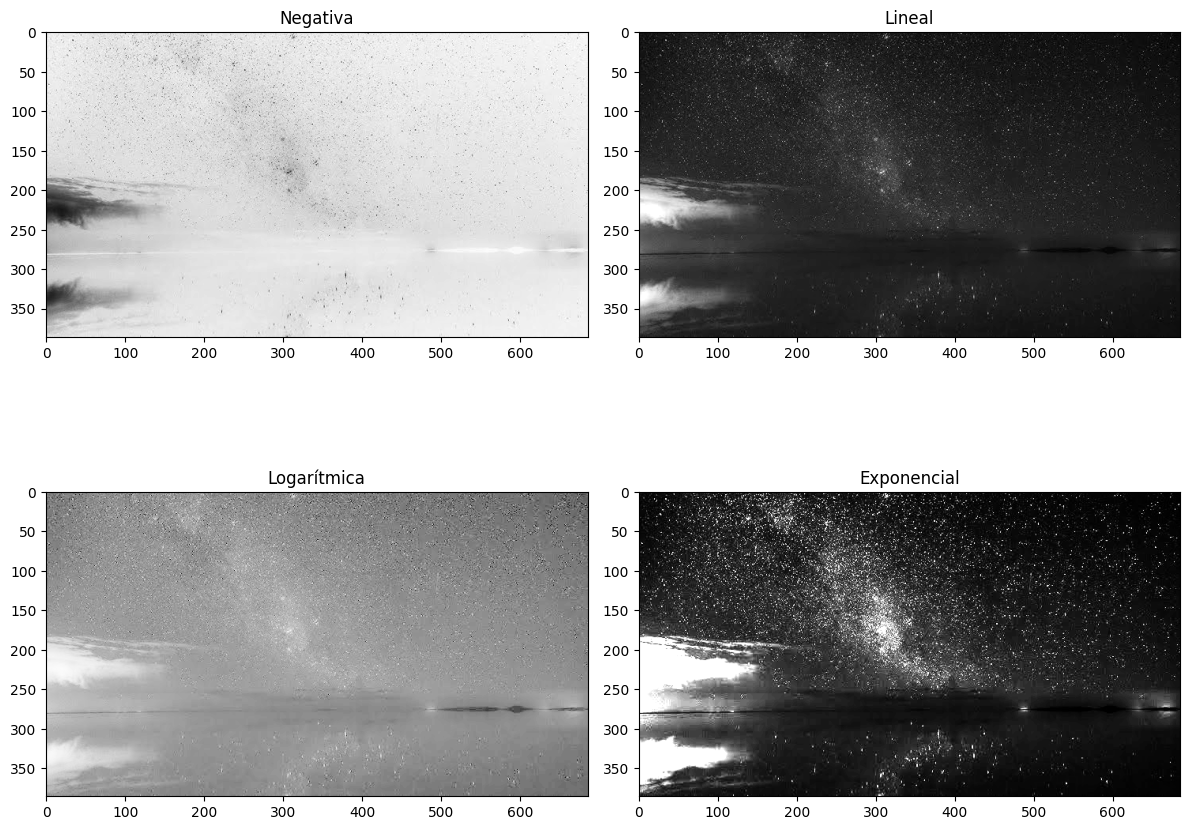

In [33]:
# Se define la función para transformación a negativo
def transf_neg(img):
    neg_img = 255 - img
    return neg_img

# Se define la función para transformación lineal
def transf_lin(img, a, b):
    linear_img = np.clip(a * img + b, 0, 255).astype(np.uint8)
    return linear_img

# Se define la función para transformación logarítmica
def transf_log(img, c):
    log_img = c * np.log(1 + img)
    return log_img

# Se define la función para transformación exponencial
def transf_exp(img, c, gamma):
    exp_img = c * np.power(img, gamma)
    exp_img = np.clip(exp_img, 0, 255).astype(np.uint8)
    return exp_img

imagen = 'hq720.jpg'
img_gris = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)

# Transformación negativa
img_neg = transf_neg(img_gris)

# Transformación lineal
a = 1.5
b = 50
img_lineal = transf_lin(img_gris, a, b)

# Transformación logarítmica
c = 30
img_log = transf_log(img_gris, c)

# Transformación exponencial
c = 0.02
gamma = 2.5
img_exp = transf_exp(img_gris, c, gamma)

# Mostrar las imágenes transformadas
plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.imshow(img_neg, cmap='gray')
plt.title('Negativa')

plt.subplot(222)
plt.imshow(img_lineal, cmap='gray')
plt.title('Lineal')

plt.subplot(223)
plt.imshow(img_log, cmap='gray')
plt.title('Logarítmica')

plt.subplot(224)
plt.imshow(img_exp, cmap='gray')
plt.title('Exponencial')

plt.tight_layout()
plt.show()


## 3. Problema
Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

*Lauterbrunnen (Bermejo, 2021)*
![Lauterbrunnen](https://images.hola.com/imagenes/viajes/20210301185248/valle-de-lauterbrunnen-suiza-belleza-alpes-suizos/0-925-354/lauterbrunnen-suiza-t.jpg)

*Vista Aérea de Tulum (Secretaría de Turismo, 2019)*
![Tulum aéreo](https://www.gob.mx/cms/uploads/article/main_image/85362/Tulum-aerea-web.jpg)

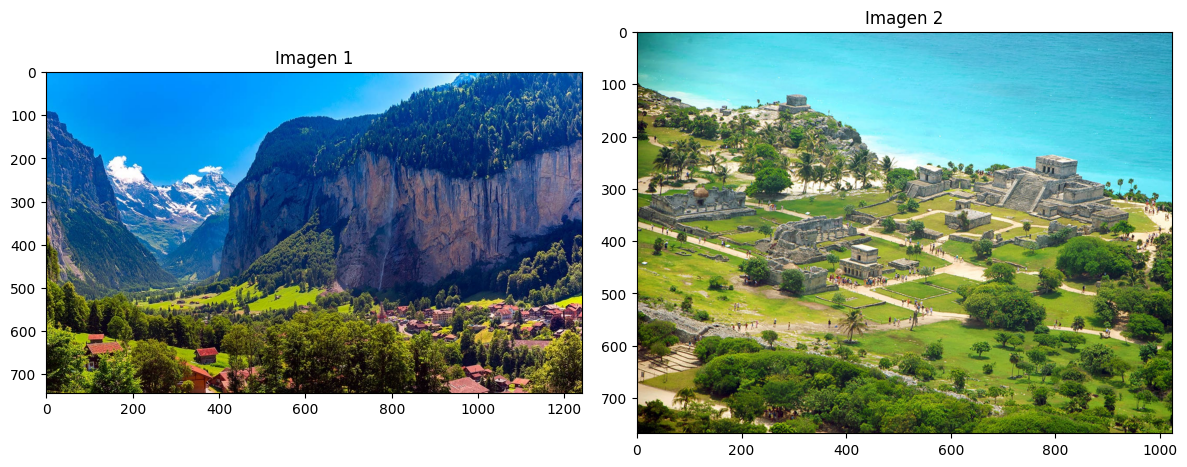

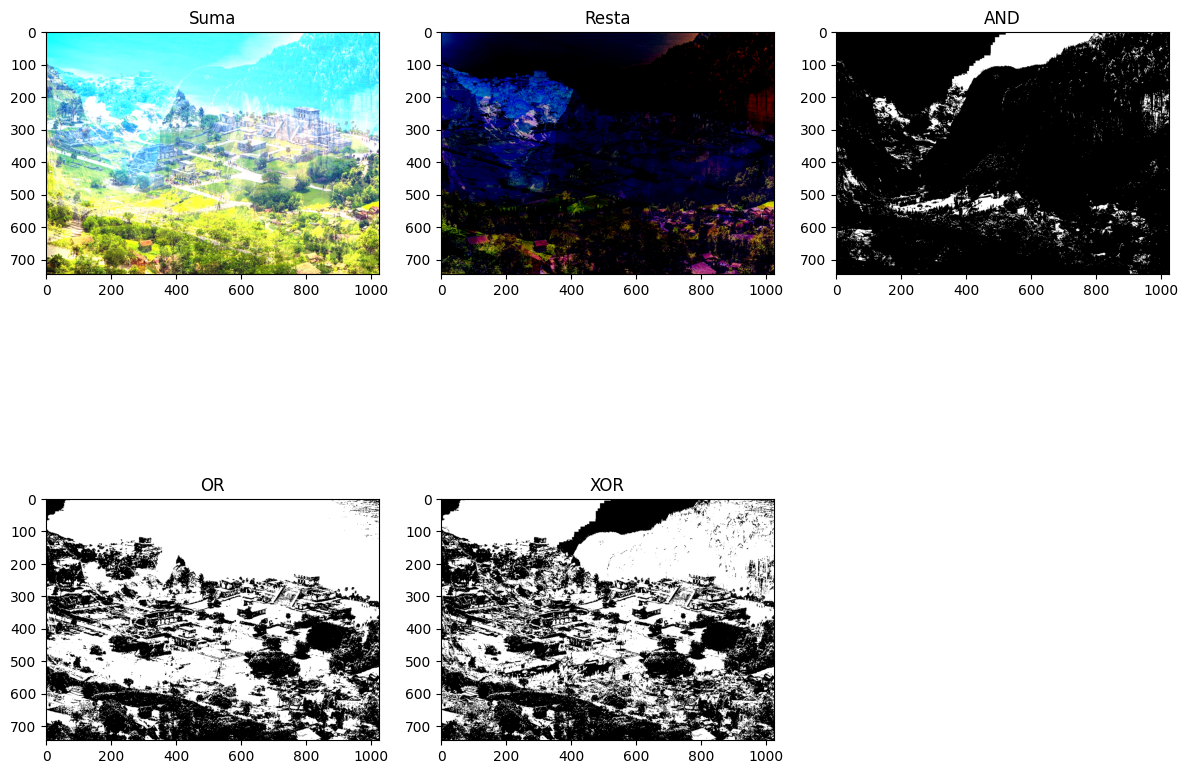

In [53]:
def operaciones_img(img1, img2):
    # Obtener las dimensiones de las imágenes
    alto1, ancho1, _ = img1.shape
    alto2, ancho2, _ = img2.shape
    
    # Determinar las dimensiones mínimas
    min_alto = min(alto1, alto2)
    min_ancho = min(ancho1, ancho2)
    
    # Redimensionar las imágenes al tamaño mínimo
    img1_ajust = cv2.resize(img1, (min_ancho, min_alto))
    img2_ajust = cv2.resize(img2, (min_ancho, min_alto))

    # Convertir las imágenes a escala de grises
    img_gris1 = cv2.cvtColor(img1_ajust, cv2.COLOR_BGR2GRAY)
    img_gris2 = cv2.cvtColor(img2_ajust, cv2.COLOR_BGR2GRAY)
    
    # Binarizar las imágenes en escala de grises
    _, bin_img1 = cv2.threshold(img_gris1, 128, 255, cv2.THRESH_BINARY)
    _, bin_img2 = cv2.threshold(img_gris2, 128, 255, cv2.THRESH_BINARY)
    
    # Realizar operaciones lógicas
    result_add = cv2.add(img1_ajust, img2_ajust)
    result_sub = cv2.subtract(img1_ajust, img2_ajust)
    result_and = cv2.bitwise_and(bin_img1, bin_img2)
    result_or = cv2.bitwise_or(bin_img1, bin_img2)
    result_xor = cv2.bitwise_xor(bin_img1, bin_img2)
    
    return result_add, result_sub, result_and, result_or, result_xor

# Cargar dos imágenes a color
img1_path = 'lauterbrunnen-suiza-t.jpg'
img2_path = 'Tulum-aerea-web.jpg'
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Realizar operaciones y obtener los resultados
add_result, sub_result, and_result, or_result, xor_result = operaciones_img(img1, img2)

# Mostrar las imágenes originales
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Imagen 1')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Imagen 2')

plt.tight_layout()
plt.show()

# Mostrar los resultados de las operaciones
plt.figure(figsize=(12, 10))

plt.subplot(231)
plt.imshow(cv2.cvtColor(add_result, cv2.COLOR_BGR2RGB))
plt.title('Suma')

plt.subplot(232)
plt.imshow(cv2.cvtColor(sub_result, cv2.COLOR_BGR2RGB))
plt.title('Resta')

plt.subplot(233)
plt.imshow(and_result, cmap='gray')
plt.title('AND')

plt.subplot(234)
plt.imshow(or_result, cmap='gray')
plt.title('OR')

plt.subplot(235)
plt.imshow(cv2.cvtColor(xor_result, cv2.COLOR_BGR2RGB))
plt.title('XOR')

plt.tight_layout()
plt.show()

### Problema 4

Realice una comparación entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV y cualquier imagen, como entregable debe mostrar una comparación entre los tres enfoques con una tabla donde se muestre las ventajas y desventajas de cada enfoque.

*Se utilizará la imagen de Audrey Hepburn (File:Audrey Hepburn 1956.jpg - Wikimedia Commons, s. f.)*
![Audrey Hepburn](https://upload.wikimedia.org/wikipedia/commons/5/5e/Audrey_Hepburn_1956.jpg)

               Métrica       Canny       Sobel  Laplaciano
0                Media    4.726416   23.890800    0.000244
1  Desviación Estándar   34.393270   32.854483   10.493311
2               Máximo  255.000000  255.000000  257.000000
3               Mínimo    0.000000    0.000000 -367.000000

Comparación entre algoritmos de detección de bordes:
        Modelo                            Canny              Sobel  \
0     Ventajas  Bueno para bordes finos y ruido    Simple y rápido   
1  Desventajas             Parámetros sensibles  Sensible al ruido   

                Laplaciano  
0  Detecta cruces y bordes  
1        Sensible al ruido  


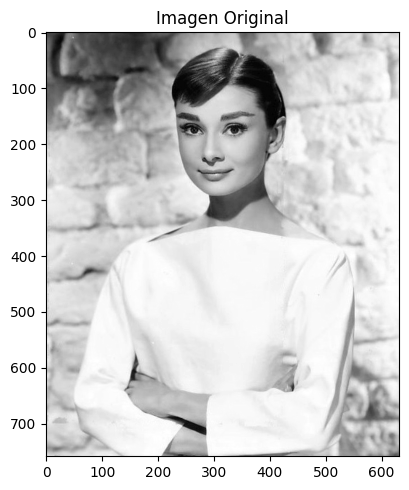

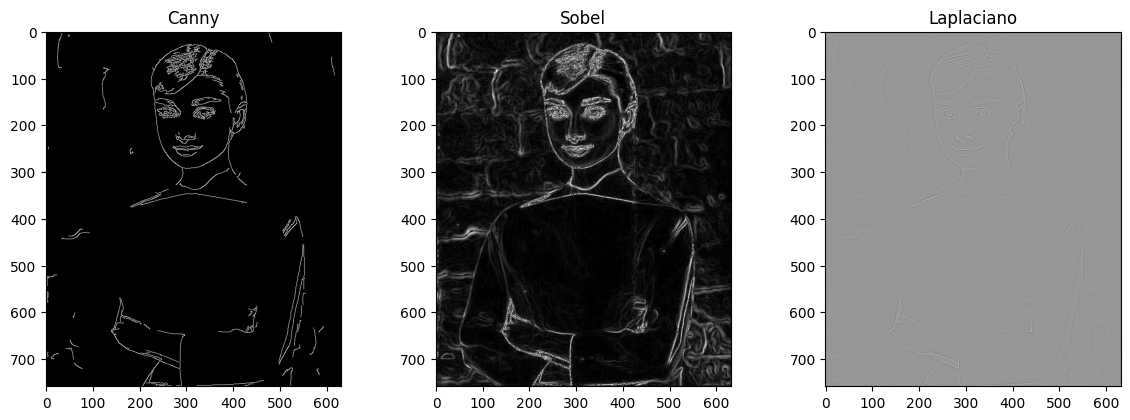

In [70]:
import pandas as pd

# Cargar una imagen
imagen = 'Audrey_Hepburn_1956.jpg'
img_original = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)

# Aplicar los algoritmos de detección de bordes
ejes_canny = cv2.Canny(img_original, 100, 200)
ejes_sobel_x = cv2.Sobel(img_original, cv2.CV_64F, 1, 0, ksize=3)
ejes_sobel_y = cv2.Sobel(img_original, cv2.CV_64F, 0, 1, ksize=3)
ejes_sobel = np.sqrt(ejes_sobel_x ** 2 + ejes_sobel_y ** 2).astype(np.uint8)
ejes_lapl = cv2.Laplacian(img_original, cv2.CV_64F)

# Crear una figura para mostrar la imagen original
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(img_original, cmap='gray')
plt.title('Imagen Original')
plt.tight_layout()

# Mostrar los resultados de detección de bordes en una figura separada
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.imshow(ejes_canny, cmap='gray')
plt.title('Canny')

plt.subplot(232)
plt.imshow(ejes_sobel, cmap='gray')
plt.title('Sobel')

plt.subplot(233)
plt.imshow(ejes_lapl, cmap='gray')
plt.title('Laplaciano')

# Calcular estadísticas
stats_canny = {
    'Media': np.mean(ejes_canny),
    'Desviación Estándar': np.std(ejes_canny),
    'Máximo': np.max(ejes_canny),
    'Mínimo': np.min(ejes_canny)
}

stats_sobel = {
    'Media': np.mean(ejes_sobel),
    'Desviación Estándar': np.std(ejes_sobel),
    'Máximo': np.max(ejes_sobel),
    'Mínimo': np.min(ejes_sobel)
}

stats_lapl = {
    'Media': np.mean(ejes_lapl),
    'Desviación Estándar': np.std(ejes_lapl),
    'Máximo': np.max(ejes_lapl),
    'Mínimo': np.min(ejes_lapl)
}

# Crear una tabla con los resultados
data = {
    'Métrica': ['Media', 'Desviación Estándar', 'Máximo', 'Mínimo'],
    'Canny': [stats_canny['Media'], stats_canny['Desviación Estándar'], stats_canny['Máximo'], stats_canny['Mínimo']],
    'Sobel': [stats_sobel['Media'], stats_sobel['Desviación Estándar'], stats_sobel['Máximo'], stats_sobel['Mínimo']],
    'Laplaciano': [stats_lapl['Media'], stats_lapl['Desviación Estándar'], stats_lapl['Máximo'], stats_lapl['Mínimo']]
}

df = pd.DataFrame(data)

# Mostrar la tabla
print(df)

# Tabla de comparación ventajas
data_2 = {
    'Modelo': ['Ventajas', 'Desventajas'],
    'Canny': ['Bueno para bordes finos y ruido', 'Parámetros sensibles'],
    'Sobel': ['Simple y rápido', 'Sensible al ruido'],
    'Laplaciano': ['Detecta cruces y bordes', 'Sensible al ruido']
}
comp=pd.DataFrame(data_2)
print('')
print('Comparación entre algoritmos de detección de bordes:')
print(comp)

# Mostrar la figura con los resultados de detección de bordes
plt.tight_layout()
plt.show()


Cabe mencionar que para mejores resultados, se pueden utilizar fotografías con mejor resolución y definición. Adicional, se pueden llegar a complementar.

Rickyrick Ricon. (2018, 14 abril). Salar de Uyuni - Bolivia at night [Vídeo]. YouTube. https://www.youtube.com/watch?v=02OZG3PdN2Y

Bermejo, J. M. (2021, 1 marzo). De cascada en cascada por el valle más bello de los Alpes suizos. HOLA. https://www.hola.com/viajes/20210301185248/valle-de-lauterbrunnen-suiza-belleza-alpes-suizos/